In [ ]:
!pip3 install virtualenv
!virtualenv ai_course_env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 7.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2980ms
  creator CPython3Posix(dest=/content/ai_course_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.2, setuptools==74.1.2, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source /content/ai_course_env/bin/activate; pip3 install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 131.6 MB/s eta 0:00:00
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


In [ ]:
# To install the requirements for the entire chapter,
!source /content/ai_course_env/bin/activate; pip install pandas
!source /content/ai_course_env/bin/activate; pip install scikit-learn
!source /content/ai_course_env/bin/activate; pip install gensim
!source /content/ai_course_env/bin/activate; pip install psutil
!source /content/ai_course_env/bin/activate; pip install spacy
!source /content/ai_course_env/bin/activate; pip install requests
!source /content/ai_course_env/bin/activate; pip install matplotlib
!source /content/ai_course_env/bin/activate; pip install nltk
!source /content/ai_course_env/bin/activate; pip install numpy
!source /content/ai_course_env/bin/activate; pip install scipy

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 91.5 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 62.8 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached gensim-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.2 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
  Using cached wrapt-1.16.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
Using cached gensim-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86

In [ ]:
import os

In [ ]:
# Download Google word2vec model
# 1. download GoogleNews-vectors-negative300.bin.gz from https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300/data (need to have a kaggle account - free)
# 2. unzip to GoogleNews-vectors-negative300.bin
# 3. upload GoogleNews-vectors-negative300.bin to your Google Drive '/drive'

In [ ]:
# mount Google Drive to Colab session
from google.colab import drive
drive.mount('/content/drive')

# copy to session drive ('/content')
!cp -r /content/drive/MyDrive/GoogleNews-vectors-negative300.bin /content

In [ ]:
import os
gn_vec_path = os.path.abspath(os.getcwd()) + "/GoogleNews-vectors-negative300.bin"
gn_vec_path

In [ ]:
import warnings #This module ignores the various types of warnings generated
warnings.filterwarnings("ignore")

import psutil #This module helps in retrieving information on running processes and system resource utilization
process = psutil.Process(os.getpid())
from psutil import virtual_memory
mem = virtual_memory()

import time #This module is used to calculate the time

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
pretrainedpath = gn_vec_path

#Load W2V model. This will take some time, but it is a one time effort!
pre = process.memory_info().rss
print("Memory used in GB before Loading the Model: %0.2f"%float(pre/(10**9))) #Check memory usage before loading the model
print('-'*10)

start_time = time.time() #Start the timer
ttl = mem.total #Toal memory available

w2v_model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True) #load the model
print("%0.2f seconds taken to load"%float(time.time() - start_time)) #Calculate the total time elapsed since starting the timer
print('-'*10)

print('Finished loading Word2Vec')
print('-'*10)

post = process.memory_info().rss
print("Memory used in GB after Loading the Model: {:.2f}".format(float(post/(10**9)))) #Calculate the memory used after loading the model
print('-'*10)

print("Percentage increase in memory usage: {:.2f}% ".format(float((post/pre)*100))) #Percentage increase in memory after loading the model
print('-'*10)

print("Number of words in vocabulary: ",len(w2v_model.key_to_index)) #Number of words in the vocabulary.

Memory used in GB before Loading the Model: 4.31
----------
46.36 seconds taken to load
----------
Finished loading Word2Vec
----------
Memory used in GB after Loading the Model: 8.43
----------
Percentage increase in memory usage: 195.67% 
----------
Number of words in vocabulary:  3000000


In [ ]:
#Let us examine the model by knowing what the most similar words are, for a given word!
w2v_model.most_similar('beautiful')

[('gorgeous', 0.8353005051612854),
 ('lovely', 0.8106936812400818),
 ('stunningly_beautiful', 0.7329413294792175),
 ('breathtakingly_beautiful', 0.7231340408325195),
 ('wonderful', 0.6854086518287659),
 ('fabulous', 0.6700063943862915),
 ('loveliest', 0.6612576246261597),
 ('prettiest', 0.6595001816749573),
 ('beatiful', 0.6593326330184937),
 ('magnificent', 0.6591402888298035)]

In [ ]:
#Let us try with another word!
w2v_model.most_similar('toronto')

[('montreal', 0.6984112858772278),
 ('vancouver', 0.6587257385253906),
 ('nyc', 0.6248832941055298),
 ('alberta', 0.6179691553115845),
 ('boston', 0.611499547958374),
 ('calgary', 0.61032634973526),
 ('edmonton', 0.6100260615348816),
 ('canadian', 0.5944076776504517),
 ('chicago', 0.5911980271339417),
 ('springfield', 0.5888351798057556)]

In [ ]:
#What is the vector representation for a word?
w2v_model['computer']

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [ ]:
# Semantic Distance

In [ ]:
# If king is a man, then what would be a woman?
w2v_model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [ ]:
# If France is known for Cheese, what's Germany known for?
w2v_model.most_similar(positive=["Cheese", "Germany"], negative=["France"])

[('Sausage', 0.5202491879463196),
 ('cheese', 0.513410747051239),
 ('Creamery', 0.5033954977989197),
 ('Pretzel', 0.5014329552650452),
 ('Dairy', 0.5003846883773804),
 ('Meat', 0.49318334460258484),
 ('Bratwurst', 0.4836159348487854),
 ('Sauerkraut', 0.48104530572891235),
 ('Cream_Cheese', 0.47292810678482056),
 ('Cheeses', 0.47099569439888)]

In [ ]:
# If Egypt was colonialized by Britain, what country(ies) was(were) colonialized by France?
w2v_model.most_similar(positive=["Egypt", "France"], negative=["Britain"])

[('Tunisia', 0.6814147233963013),
 ('Tunisian', 0.5854420065879822),
 ('Morocco', 0.5759512186050415),
 ('Algeria', 0.5727994441986084),
 ('Senegal', 0.5584050416946411),
 ('Tunis', 0.5563371777534485),
 ('Egyptian', 0.5392418503761292),
 ('Marseille', 0.5191505551338196),
 ('Egyptians', 0.5142582058906555),
 ('Syria', 0.5099706649780273)]

In [ ]:
# If Argentina's top sport is soccer, what's Canada's?
w2v_model.most_similar(positive=["soccer", "Canada"], negative=["Argentina"])

[('hockey', 0.6079139709472656),
 ('lacrosse', 0.5327270030975342),
 ('Lacrosse', 0.5284605622291565),
 ('ringette', 0.5049694776535034),
 ('slo_pitch', 0.4973623752593994),
 ('Ringette', 0.49230989813804626),
 ('Soccer', 0.4841524660587311),
 ('sledge_hockey', 0.47955548763275146),
 ('Tenpin_Federation', 0.47879505157470703),
 ('Hockey', 0.4768226742744446)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

In [ ]:
# For GloVe
# glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
# visualize_embeddings(glove_embeddings, glove_words)

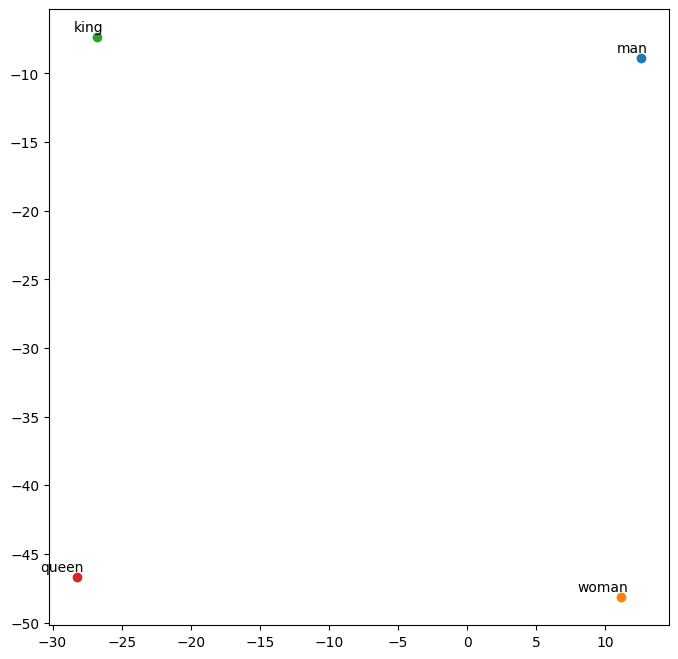

In [ ]:
words = ["man", "woman", "king", "queen"]
visualize_embeddings(w2v_model, words)

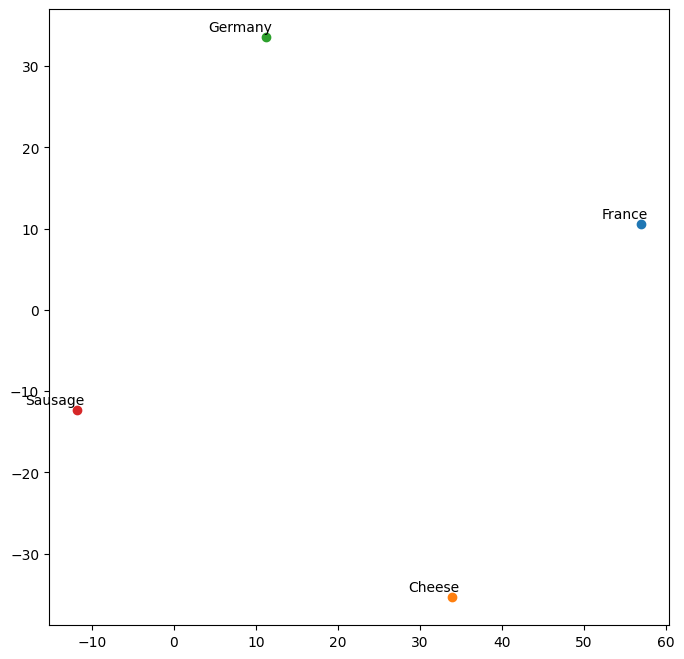

In [ ]:
words = ["France", "Cheese", "Germany", "Sausage"]
visualize_embeddings(w2v_model, words)

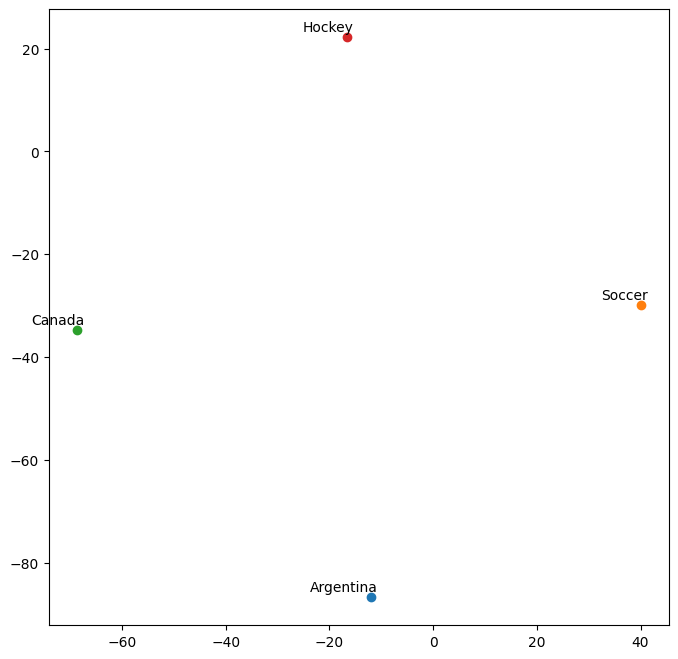

In [ ]:
words = ["Argentina", "Soccer", "Canada", "Hockey"]
visualize_embeddings(w2v_model, words)

In [ ]:
# Out of vocabulary
w2v_model.most_similar("zanzibar")

NameError: name 'w2v_model' is not defined

In [ ]:
w2v_model.most_similar("University")

[('Univeristy', 0.8092197775840759),
 ('Unviersity', 0.7474979162216187),
 ('Unversity', 0.7462714314460754),
 ('Univerity', 0.7304686307907104),
 ('Universtiy', 0.7281127572059631),
 ('Univesity', 0.7269728183746338),
 ('Univer_sity', 0.7068116068840027),
 ('Uni_versity', 0.6904415488243103),
 ('Universitys', 0.6862248778343201),
 ('Universty', 0.6854063272476196)]

In [ ]:
w2v_model.most_similar("Carleton University")

KeyError: "Key 'Carleton_University' not present in vocabulary"

In [ ]:
#What if I am looking for a word that is not in this vocabulary?
w2v_model['practicalnlp']

KeyError: "word 'practicalnlp' not in vocabulary"

#### Two things to note while using pre-trained models:


1.   Tokens/Words are always lowercased. If a word is not in the vocabulary,   the model throws an exception.
2.   So, it is always a good idea to encapsulate those statements in try/except blocks.



# 2. Getting the embedding representation for full text

We have seen how to get embedding vectors for single words. How do we use them to get such a representation for a full text? A simple way is to just sum or average the embeddings for individual words. We will see an example of this using Word2Vec in Chapter 4. Let us see a small example using another NLP library Spacy - which we saw earlier in Chapter 2 too.


In [ ]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy

%time
nlp = spacy.load('en_core_web_md')
# process a sentence using the model
mydoc = nlp("Canada is a large country")
#Get a vector for individual words
#print(doc[0].vector) #vector for 'Canada', the first word in the text
print(mydoc.vector) #Averaged vector for the entire sentence

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
[-1.12055197e-01  2.26087615e-01 -5.15111461e-02 -1.21812008e-01
  4.13958639e-01 -8.56475979e-02 -2.84600933e-03 -2.26096585e-01
  6.98113963e-02  2.27946019e+00 -4.49774921e-01 -6.39050007e-02
 -1.80326015e-01 -8.79765972e-02  9.93399299e-04 -1.57384202e-01
 -1.23817801e-01  1.54990411e+00  2.00794004e-02  1.38399601e-01
 -1.48897991e-01 -2.23025799e-01 -1.48171991e-01  4.68924567e-02
 -3.17026004e-02  1.19096041e-02 -6.10985979e-02  9.57068056e-02
  9.37099904e-02  1.70955807e-01 -9.29740071e-03  7.88536817e-02
  1.74508005e-01 -1.04450598e-01  1.04872189e-01 -1.16961405e-01
  6.23028055e-02 -2.23016590e-01 -1.44107476e-01 -2.03423887e-01
  2.61404991e-01  2.43404001e-01  1.51980996e-01 -1.12484001e-01
  1.18055798e-01 -9.51323956e-02  8.66319984e-02 -2.54322797e-01
  3.84932049e-02  1.18278004e-01 -3.21602583e-01  3.73764008e-01
  1.13018408e-01 -8.05834010e-02  1.84921592e-01  9.38879885e-03
  1.22166201e-01 -3.242880

In [ ]:
#What happens when I give a sentence with strange words (and stop words), and try to get its word vector in Spacy?
temp = nlp('practicalnlp is a newword')
temp[0].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Well, at least, this is better than throwing an exception! :)

